#**EDA Travel Analysis with Pandas**

###Tecnicatura Universitaria en Inteligencia Artificial - FCEIA - UNR

Comisión II - **Barbarroja, Federico**

*2025*

#Resolución

## Carga y limpieza de datos

In [13]:
#Cargamos el dataset y librerias que vamos a utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

viajes = pd.read_excel('Viajes_ENMODO18.xlsx')


In [12]:
#Empezamos la limpieza reemplazando formatos para facilitar el análisis
viajes['duracion_minutos'] = pd.to_numeric(viajes['duracion_minutos'], errors='coerce')
viajes['distancia_viaje_km'] = pd.to_numeric(viajes['distancia_viaje_km'], errors='coerce')


## Análisis

### Distribución horaria

In [45]:
#para uno de nuestros análisis es necesario saber la hora de inicio, por lo que descartamos los campos que no cuenten con ese dato
viajes_hora_inicio = viajes[viajes['hora_inicio'] != '-'].copy()

#pasamos a entero toda la columna
viajes_hora_inicio['hora_inicio'] = viajes_hora_inicio['hora_inicio'].astype('int')

#Creamos una función que asigne la etapa del dìa según el horario de inicio del viaje
def clasificar_etapa(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 20:
        return 'Tarde'
    else:
        return 'Noche'

#Llamamos a a función y se lo aplicamos a cada una de las filas.
viajes_hora_inicio['Etapa_dia'] = viajes_hora_inicio['hora_inicio'].apply(clasificar_etapa)


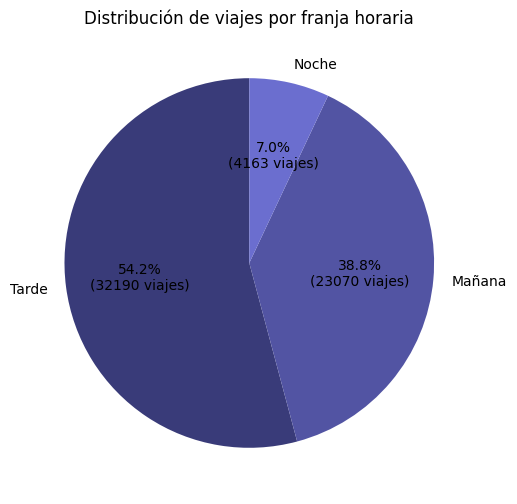

In [46]:

#creamos una tabla de frecuencias de la cantidad de viajes.
conteo_etapas = viajes_hora_inicio['Etapa_dia'].value_counts()

#función que permite mostrar la cantidad de viajes de cada una de las etapas junto a su porcentaje del total.
def mostrar_etiquetas(valor):
    total = sum(conteo_etapas)
    cantidad = int(round(valor * total / 100))
    return f'{valor:.1f}%\n({cantidad} viajes)'


#Creamos un gráfico circular para visualizar las proporciones de el día en el que más viaja la gente.
plt.figure(figsize=(6, 6))
plt.pie(conteo_etapas, labels=conteo_etapas.index, autopct=mostrar_etiquetas, startangle=90, colors = plt.get_cmap('tab20b').colors)
plt.title('Distribución de viajes por franja horaria')
plt.show()



Text(0.5, 1.0, 'Motivo de Viaje por Franja Horaria')

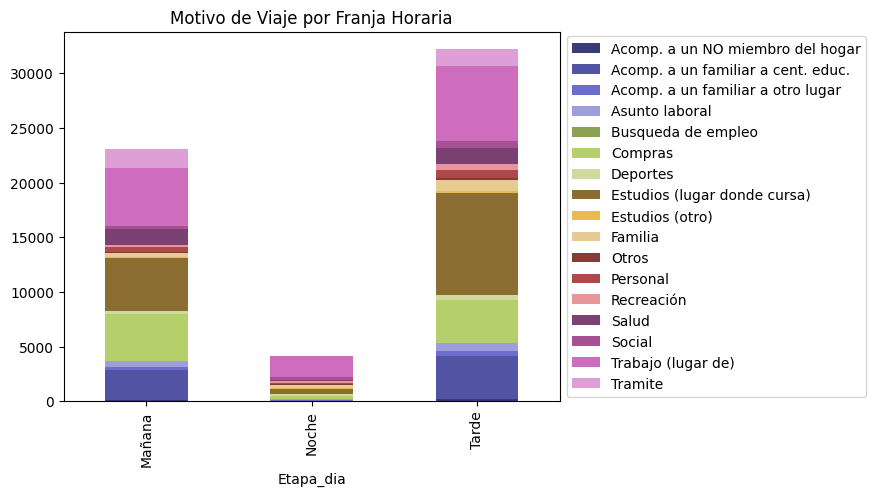

In [47]:
#Tambien queríamos saber el motivo de los viajes, asi que procedemos a ver a que corresponden cada uno de los viajes en cada franja horaria.
mapeo_motivo = {
    2: 'Trabajo (lugar de)',
    3: 'Asunto laboral',
    4: 'Estudios (lugar donde cursa)',
    5: 'Estudios (otro)',
    6: 'Salud',
    7: 'Compras',
    8: 'Social',
    9: 'Familia',
    10: 'Deportes',
    11: 'Recreación',
    12: 'Personal',
    13: 'Tramite',
    14: 'Busqueda de empleo',
    15: 'Acomp. a un familiar a cent. educ.',
    16: 'Acomp. a un familiar a otro lugar',
    17: 'Acomp. a un NO miembro del hogar',
    22: 'Otros'
}

# Creamos una nueva columna con los nombres descriptivos
viajes_hora_inicio['motivo_nombre'] = viajes_hora_inicio['motivo'].map(mapeo_motivo)


pd.crosstab(viajes_hora_inicio['Etapa_dia'], viajes_hora_inicio['motivo_nombre']).plot(kind='bar', stacked=True, colormap='tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Motivo de Viaje por Franja Horaria')

### Medio de transporte

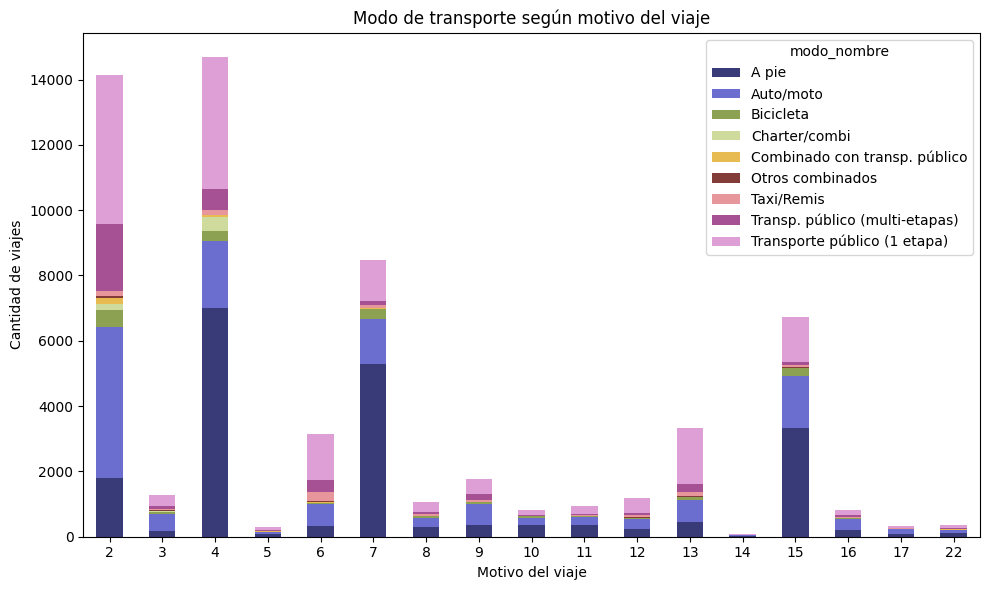

In [36]:
# Creamos un diccionario para traducir los códigos de la columna 'modo_des'
mapeo_modo = {
    1: 'Bicicleta',
    2: 'A pie',
    3: 'Taxi/Remis',
    4: 'Transporte público (1 etapa)',
    5: 'Auto/moto',
    6: 'Charter/combi',
    7: 'Combinado con transp. público',
    8: 'Transp. público (multi-etapas)',
    9: 'Otros combinados'
}

# Creamos una nueva columna con los nombres descriptivos
viajes['modo_nombre'] = viajes['modo_des'].map(mapeo_modo)


# Creamos una tabla de frecuencia cruzada
tabla_motivo_modo = pd.crosstab(viajes['motivo'], viajes['modo_nombre'])


# Graficamos en forma de barras apiladas
tabla_motivo_modo.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20b')
plt.title('Modo de transporte según motivo del viaje')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Motivo del viaje')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###Origen / Destino

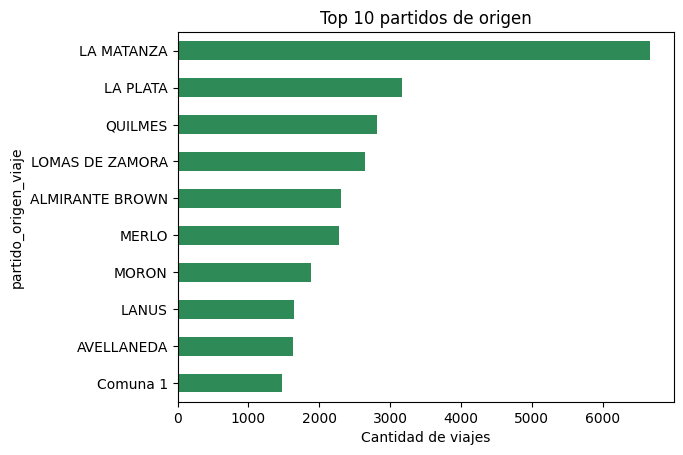

In [18]:
#Contamos y guardamos los 10 partidos con mayores viaje de origen.
#obtenemos una tabla de frecuencia de los viajes por partido
origenes = viajes['partido_origen_viaje'].value_counts().head(10)

origenes.plot(kind='barh', color='seagreen', title='Top 10 partidos de origen')
plt.xlabel('Cantidad de viajes')
#invertimos el gráfico para que aparezca el de mayor numero de viajes arriba de todo.
plt.gca().invert_yaxis()

plt.show()


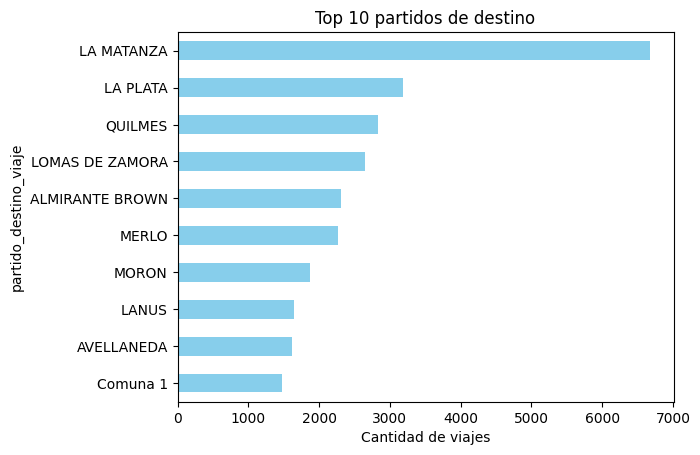

In [19]:
#Aplicamos el mismo proceso pero esta vez con el destino.
destinos = viajes['partido_destino_viaje'].value_counts().head(10)
destinos.plot(kind='barh', color='skyblue', title='Top 10 partidos de destino')
plt.xlabel('Cantidad de viajes')
plt.gca().invert_yaxis()
plt.show()

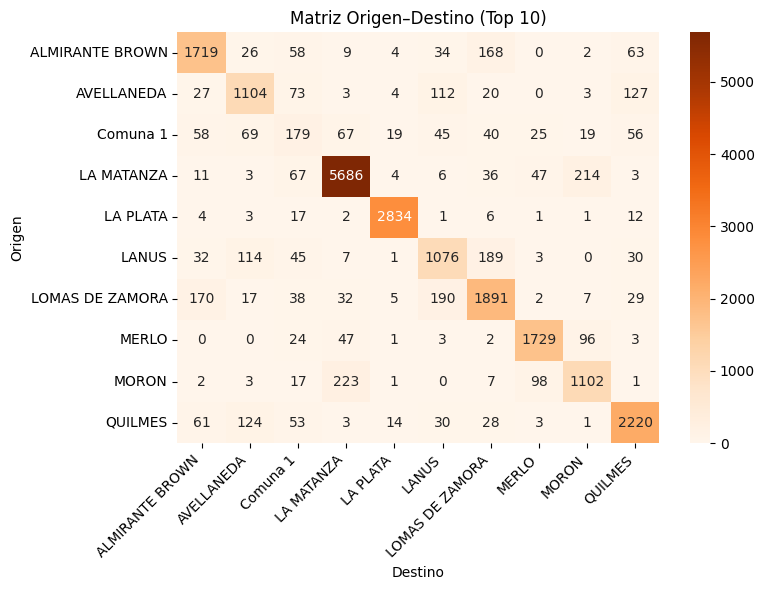

In [49]:
# Filtramos los 10 partidos más frecuentes como origen y destino

#Obtenemos dos listas con solamente los nombres de los partidos.
top_origenes = viajes['partido_origen_viaje'].value_counts().head(10).index
top_destinos = viajes['partido_destino_viaje'].value_counts().head(10).index

#Creamos un nuevo DataFrame con solo los viajes entre los partidos más importantes. Es decir que tanto en origen como en destino este uno de los 10 partidos con más viajes
top_10 = viajes[viajes['partido_origen_viaje'].isin(top_origenes) & viajes['partido_destino_viaje'].isin(top_destinos)]

# Cramos la matriz, en la que cuenta cuantos viajes hubo desde un partido del top 10 hasta otro partido del top 10.
matriz_top_10 = pd.crosstab(top_10['partido_origen_viaje'], top_10['partido_destino_viaje'])

# Graficamos la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_top_10, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz Origen–Destino (Top 10)')
plt.xlabel('Destino')
plt.ylabel('Origen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Tiempo

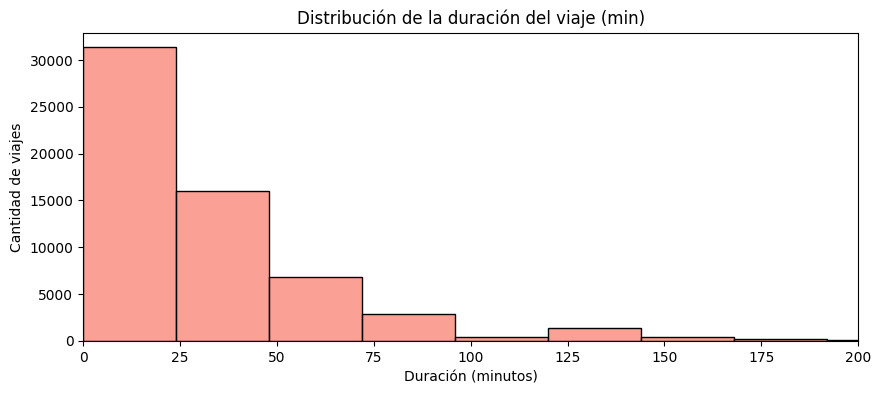

La duracion promedio de los viajes es de 31.28 minutos
La mediana del tiempo de los viajes es de 20.0 minutos
La duración del 90% de los viajes es como máximo de 60.0 minutos


In [52]:
#Veamos algunas medidda de tiempo

#Confirmamos que la columna este en formato numérico
viajes['duracion_minutos'] = pd.to_numeric(viajes['duracion_minutos'], errors='coerce')

#creamos un histograma que represente la duracion y cantidad de viajes
plt.figure(figsize=(10, 4))
sns.histplot(viajes['duracion_minutos'], bins=50, color='salmon')
plt.title('Distribución de la duración del viaje (min)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de viajes')
plt.xlim(0, 200)
#Se limita la vision del gráfico con motivo de una mejor visualización, quitando outliers absurdos
plt.show()

media_tiempo = viajes['duracion_minutos'].mean()
mediana_tiempo = viajes['duracion_minutos'].median()
cuantil90 = viajes['duracion_minutos'].quantile(0.9)
cuantil50 = viajes['duracion_minutos'].quantile(0.5)

print(f'La duracion promedio de los viajes es de {round(media_tiempo,2)} minutos')
print(f'La mediana del tiempo de los viajes es de {round(mediana_tiempo,2)} minutos')
print(f'La duración del 90% de los viajes es como máximo de {cuantil90} minutos')


### Distancia

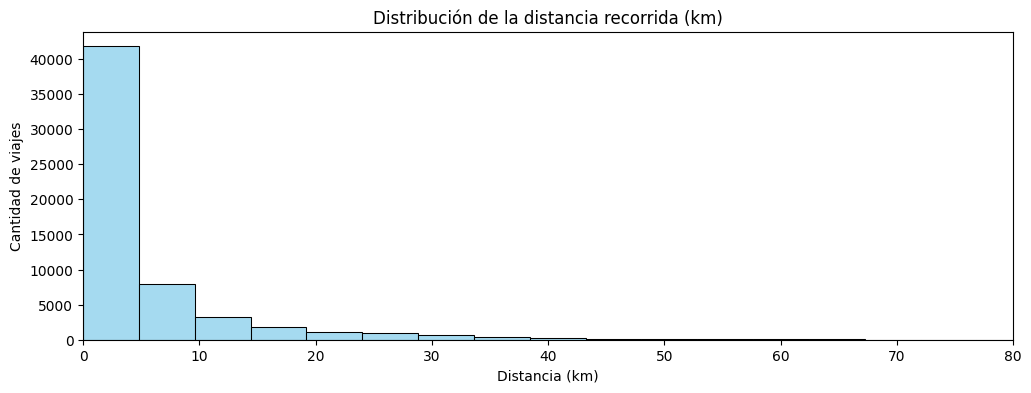

La distancia promedio de los viajes es de 5.23 km
La mediana de la distancia los viajes es de 2.08 km
La distancia del 70% de los viajes es de a lo sumo 4.5 km


In [56]:
#Veamos algunas medida de distancia

#Confirmamos que la columna este en formato numérico
viajes['distancia_viaje_km'] = pd.to_numeric(viajes['distancia_viaje_km'], errors='coerce')

#creamos un histograma que represente la dstancia y cantidad de viajes
plt.figure(figsize=(12, 4))
sns.histplot(viajes['distancia_viaje_km'], bins=80, color='skyblue')
plt.title('Distribución de la distancia recorrida (km)')
plt.xlabel('Distancia (km)')
plt.ylabel('Cantidad de viajes')
plt.xlim(0, 80)
#Se limita la vision del gráfico con motivo de una mejor visualización, quitando outliers absurdos
plt.show()

#Calculamos media y mediana de las distancias.
media_dist = viajes['distancia_viaje_km'].mean()
mediana_dist = viajes['distancia_viaje_km'].median()
cuantil_dist = viajes['distancia_viaje_km'].quantile(0.7)

print(f'La distancia promedio de los viajes es de {round(media_dist,2)} km')
print(f'La mediana de la distancia los viajes es de {round(mediana_dist,2)} km')
print(f'La distancia del 70% de los viajes es de a lo sumo {round(cuantil_dist,2)} km')